In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('housing.csv')
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,Year,Rooms
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,NaN,NaN,0,5,2010,WD,Normal,215000,1999 or older,7 rooms or more
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,MnPrv,NaN,0,6,2010,WD,Normal,105000,1999 or older,6 rooms or less
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,NaN,Gar2,12500,6,2010,WD,Normal,172000,1999 or older,6 rooms or less
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,NaN,NaN,0,4,2010,WD,Normal,244000,1999 or older,7 rooms or more
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,MnPrv,NaN,0,3,2010,WD,Normal,189900,1999 or older,6 rooms or less


In [3]:
data.shape

(2930, 84)

### we are going to analyse house prices relation with other factors

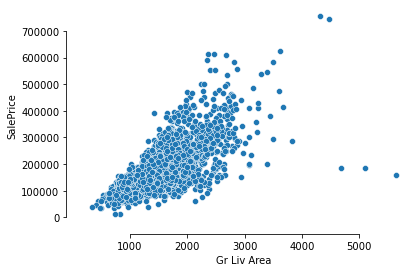

In [6]:
sns.scatterplot(x = 'Gr Liv Area', y = 'SalePrice', data = data)
sns.despine(offset = 10, trim = True )

plt.show()

### Graph shows that price increasing as Gr Liv Area increases but there is 3 houses which have greater area but low price, that we need to analyse why they have low sale price

##### first seperate these homes

In [7]:
outliers = data[data['Gr Liv Area'] > 4500]
outliers

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,Year,Rooms
1498,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,...,NaN,NaN,0,1,2008,New,Partial,160000,2000 or newer,7 rooms or more
2180,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,...,NaN,Elev,17000,10,2007,New,Partial,183850,2000 or newer,7 rooms or more
2181,2182,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,...,NaN,NaN,0,10,2007,New,Partial,184750,2000 or newer,7 rooms or more


### Now we will check reasons why they have low sale price

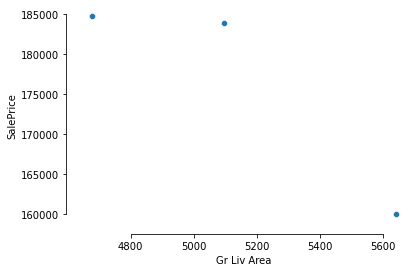

In [8]:
sns.scatterplot(x = 'Gr Liv Area', y = 'SalePrice', data = outliers)
sns.despine(offset = 10, trim = True )

plt.show()

In [9]:
outliers.corr()['SalePrice'].sort_values(ascending = False)

SalePrice          1.000000
Order              0.999526
Mo Sold            0.999486
Garage Cars        0.999486
Bsmt Unf SF        0.933502
Open Porch SF      0.901389
Full Bath          0.527506
Year Remod/Add     0.471979
Misc Val           0.471979
Bsmt Half Bath     0.471979
Wood Deck SF       0.458250
Mas Vnr Area       0.412742
TotRms AbvGrd      0.246407
2nd Flr SF        -0.102818
1st Flr SF        -0.351725
MS SubClass       -0.471979
Bedroom AbvGr     -0.471979
Year Built        -0.527506
Garage Yr Blt     -0.527506
Total Bsmt SF     -0.782249
BsmtFin SF 1      -0.872098
Garage Area       -0.878529
Fireplaces        -0.881610
Gr Liv Area       -0.915043
PID               -0.962526
Lot Area          -0.998150
Lot Frontage      -0.999140
Pool Area         -0.999486
Bsmt Full Bath    -0.999486
Yr Sold           -0.999486
Overall Qual            NaN
Overall Cond            NaN
BsmtFin SF 2            NaN
Low Qual Fin SF         NaN
Half Bath               NaN
Kitchen AbvGr       

In [10]:
data['Yr Sold'].unique()

array([2010, 2009, 2008, 2007, 2006], dtype=int64)

In [11]:
data['Bsmt Full Bath'].unique()

array([ 1.,  0.,  2.,  3., nan])

In [12]:
data['Pool Area'].unique()

array([  0, 144, 480, 576, 555, 368, 444, 228, 561, 519, 648, 800, 512,
       738], dtype=int64)

In [13]:
data['Bedroom AbvGr'].unique()

array([3, 2, 1, 4, 6, 5, 0, 8], dtype=int64)

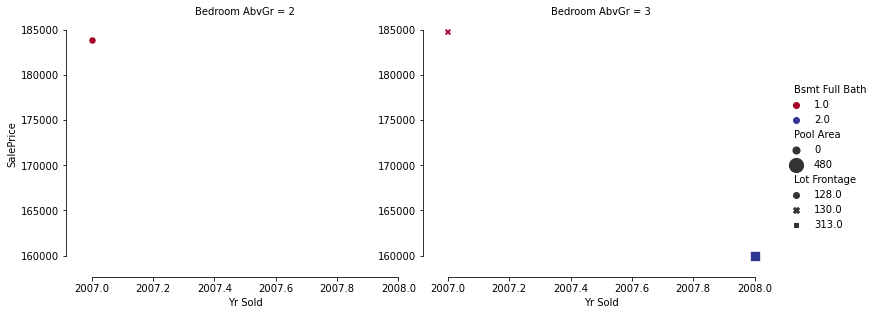

In [14]:

sns.set_palette('bright')
g = sns.relplot(x = 'Yr Sold', y = 'SalePrice', data = outliers, hue = 'Bsmt Full Bath', size = 'Pool Area',\
               palette = "RdYlBu", style = 'Lot Frontage', sizes = (50,200), col = 'Bedroom AbvGr', col_wrap = 2 )
g.fig.set_figheight(4)
g.fig.set_figwidth(12)
sns.despine(offset = 10, trim = True)

plt.show()

## Hypothesis
### First 2 houses have low sale price due to old yr , less Bsmt Full Bath, Less Pool Area and Less Lot Frontage.While the 3rd house has low sale price due to less Bedroom AbvGr.